# Data Analysis

#### This notebook will be used for the analysis part of the project. Here we will explore and visualise the data to get a firm grasp on what the data looks like.


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

### A tale of two data sets

Two sets of data will be used in this project. 

1. The set of organisations fulfilled by the [IPEDS Data base](https://nces.ed.gov/ipeds/)
2. The customer behavior is a ficticious data set creating random numbers and ranges. Fingers crossed we have some correlation in the data. 


In [18]:
# Read data to frame

# Import IPDES data
# The data comes in the form of csv
df_organisations_raw = pd.read_csv("../data/hd2019.csv", encoding='latin1') #encoding had to be added to be able to read the file
# Import the customer behaviour data
df_customer_data_raw = pd.read_csv("../data/organisation_sales_data.csv")


In [19]:
# Define data shape 

raw_org_columns = df_organisations_raw.shape[1]
raw_org_rows = df_organisations_raw.shape[0]

# Manual identification of columns that will have values 
columns_of_value = ['UNITID', 'INSTNM', 'IALIAS', 'CITY', 'STABBR', 'FIPS', 'OBEREG','GENTELE', 'EIN', 'DUNS', 'OPEID', 
                    'OPEFLAG', 'SECTOR', 'ICLEVEL', 'CONTROL', 'HLOFFER', 'UGOFFER','GROFFER', 'HDEGOFR1', 'DEGGRANT', 
                    'HBCU', 'HOSPITAL', 'MEDICAL', 'TRIBAL', 'LOCALE', 'OPENPUBL', 'ACT', 'DEATHYR', 'CYACTIVE', 
                    'POSTSEC', 'PSEFLAG', 'PSET4FLG', 'RPTMTH', 'INSTCAT', 'C18BASIC', 'C18IPUG', 'C18IPGRD', 'C18UGPRF', 
                    'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', 'LANDGRNT', 'INSTSIZE', 'F1SYSTYP', 
                    'F1SYSCOD', 'COUNTYNM', 'CNGDSTCD']

df_organisations = df_organisations_raw[columns_of_value]

# Testing for columns that aren't ranges (categorical)
# cust_cols_of_value = ['UNITID', 'CONVERTED', 'DID_TRIAL', 'PURCHASED_PREVIOUS_PRODUCT','AMOUNT_OF_LICENSES',
#                       'TERM_OF_LICENSE', 'HAS_TECH_DEPT', 'AMOUNT_OF_INTERACTIONS_W_SALES', 'AMOUNT_OF_CALLS', 
#                       'AMOUNT_OF_MESSAGES', 'ENGAGED_WITH_MESSAGING', 'REACHED_NOT_ENGAGED_WITH_MESSAGING', 
#                       'ATTENDED_WEBINARS', 'WEBINAR_ATTENDANCE_SIZE']

cust_cols_of_value = ['UNITID', 'CONTACTED', 'CONVERTED', 'DID_TRIAL', 'PURCHASED_PREVIOUS_PRODUCT','AMOUNT_OF_LICENSES',
                      'AMOUNT_OF_LICENSES_RNG', 'TERM_OF_LICENSE', 'TERM_OF_LICENSE_RNG', 'HAS_TECH_DEPT', 
                      'AMOUNT_OF_INTERACTIONS_W_SALES', 'AMOUNT_OF_INTERACTIONS_W_SALES_RNG','AMOUNT_OF_CALLS', 
                      'AMOUNT_OF_CALLS_RNG', 'AMOUNT_OF_MESSAGES', 'AMOUNT_OF_MESSAGES_RNG', 'ENGAGED_WITH_MESSAGING', 
                      'REACHED_NOT_ENGAGED_WITH_MESSAGING', 'ATTENDED_WEBINARS', 'WEBINAR_ATTENDANCE_SIZE', 
                      'WEBINAR_ATTENDANCE_SIZE_RNG']

df_customer_data = df_customer_data_raw[cust_cols_of_value]


In [20]:
# Filter the dataset to remove records that arent relevant
# Remove institutions that have closed down  or removed from IPEDS using column CLOSEDAT & DEATHYR

df_organisations_filtered = df_organisations.loc[(df_organisations['DEATHYR']==-2)]

### Uderstanding the data
* Get the shape of the data
* Identify columns with categorical values
* Visualise the organisations by state

In [21]:
# Understading the data

raw_columns = df_organisations_raw.shape[1]
raw_rows = df_organisations_raw.shape[0]
org_columns = df_organisations.shape[1]
org_rows = df_organisations_raw.shape[0]
fil_org_columns = df_organisations_filtered.shape[1]
fil_org_rows = df_organisations_filtered.shape[0]
is_nulls_counts = len(df_organisations_filtered.columns[df_organisations_filtered.isnull().sum()==0])
categorical_vals = df_organisations_filtered.select_dtypes(include=['object'])
categorical_vals_columns = list(categorical_vals.columns)

print(f'The raw data has {raw_columns} columns and {raw_rows} rows')
print(f'The unfiltered reduced data has {org_columns} columns and {org_rows} rows')
print(f'The filtered organisations df has {fil_org_columns} columns and {fil_org_rows} rows')
print(f'The df has {df_organisations_filtered.shape[1]} columns without {is_nulls_counts} containing nulls')
print(f'There are {categorical_vals.shape[1]} columns with categorical values, they are in the columns: '
      f'\n\n{categorical_vals_columns}')


The raw data has 73 columns and 6559 rows
The unfiltered reduced data has 49 columns and 6559 rows
The filtered organisations df has 49 columns and 6388 rows
The df has 49 columns without 48 containing nulls
There are 8 columns with categorical values, they are in the columns: 

['INSTNM', 'IALIAS', 'CITY', 'STABBR', 'GENTELE', 'DUNS', 'ACT', 'COUNTYNM']


## The distribution of organisations across states
The Top 5 States with organisations: 
CA, NY, FL, PA, TX

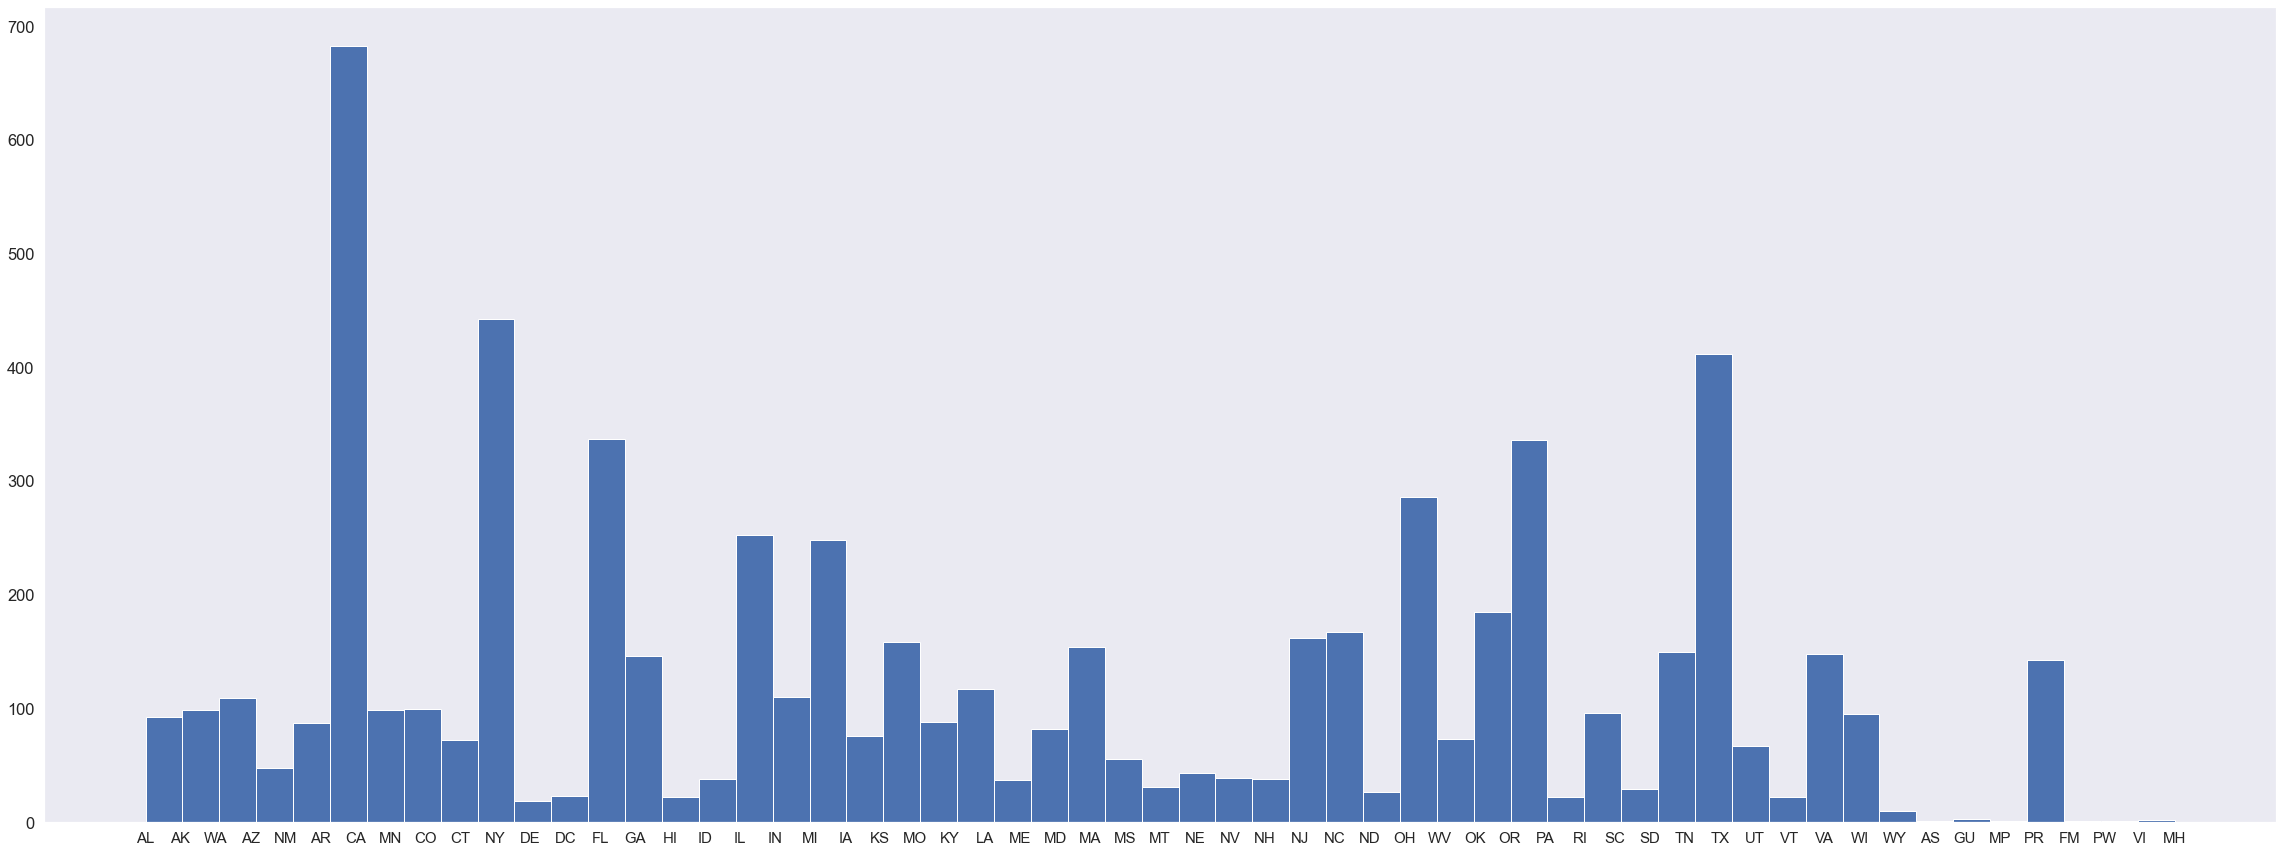

In [22]:
df_organisations_filtered['STABBR'].hist(bins=55, grid=False, figsize=(40, 15), xlabelsize=15);

In [23]:
df_organisations_filtered.head()

,UNITID,INSTNM,IALIAS,CITY,STABBR,FIPS,OBEREG,GENTELE,EIN,DUNS,...,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSCOD,COUNTYNM,CNGDSTCD
0,100654,Alabama A & M University,AAMU,Normal,AL,1,5,2563725000,636001109,197216455,...,14,18,18,16,1,3,2,-2,Madison County,105
1,100663,University of Alabama at Birmingham,,Birmingham,AL,1,5,2059344011,636005396,063690705,...,15,15,15,15,2,5,1,101050,Jefferson County,107
2,100690,Amridge University,Southern Christian University Regions University,Montgomery,AL,1,5,33438738777550,237034324,126307792,...,6,20,21,51,2,1,2,-2,Montgomery County,102
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,Huntsville,AL,1,5,2568246120,630520830,949687123,...,12,16,15,16,2,3,1,101050,Madison County,105
4,100724,Alabama State University,,Montgomery,AL,1,5,3342294100,636001101,040672685,...,14,19,18,21,2,2,2,-2,Montgomery County,107


In [24]:
df_customer_data.head()

,UNITID,CONTACTED,CONVERTED,DID_TRIAL,PURCHASED_PREVIOUS_PRODUCT,AMOUNT_OF_LICENSES,AMOUNT_OF_LICENSES_RNG,TERM_OF_LICENSE,TERM_OF_LICENSE_RNG,HAS_TECH_DEPT,...,AMOUNT_OF_INTERACTIONS_W_SALES_RNG,AMOUNT_OF_CALLS,AMOUNT_OF_CALLS_RNG,AMOUNT_OF_MESSAGES,AMOUNT_OF_MESSAGES_RNG,ENGAGED_WITH_MESSAGING,REACHED_NOT_ENGAGED_WITH_MESSAGING,ATTENDED_WEBINARS,WEBINAR_ATTENDANCE_SIZE,WEBINAR_ATTENDANCE_SIZE_RNG
0,100654,1,1,1,0,429,[401 - 500],5,[3 - 5],0,...,[51 - 100],18,[1 - 50],36,[1 - 50],1,1,1,15,[11 - 15]
1,100663,1,1,0,0,50,[1 - 50],7,[6 - 8],0,...,[301 - 400],292,[201 - 300],37,[1 - 50],0,1,0,0,[0]
2,100690,1,1,0,1,257,[201 - 300],6,[6 - 8],0,...,[401 - 500],66,[51 - 100],371,[301 - 400],1,1,1,17,[16 - 20]
3,100706,1,1,0,1,175,[101 - 200],6,[6 - 8],1,...,[101 - 200],117,[101 - 200],74,[51 - 100],1,1,1,20,[16 - 20]
4,100724,0,0,0,0,0,[0],0,[0],0,...,[0],0,[0],0,[0],0,0,0,0,[0]


In [25]:
cust_raw_columns = df_customer_data.shape[1]
cust_raw_rows = df_customer_data.shape[0]
cust_is_nulls_counts = len(df_customer_data.columns[df_customer_data.isnull().sum()==0])
cust_categorical_vals = df_customer_data.select_dtypes(include=['object'])
cust_categorical_vals_columns = list(cust_categorical_vals.columns)

print(f'The raw customer data has {cust_raw_columns} columns and {cust_raw_rows} rows')
print(f'The customer df has {cust_is_nulls_counts} columns without null values')
print(f'There are {cust_categorical_vals.shape[1]} categorical values in the customer data set. they are in the columns: '
      f'\n\n{cust_categorical_vals_columns}')


The raw customer data has 21 columns and 6559 rows
The customer df has 21 columns without null values
There are 6 categorical values in the customer data set. they are in the columns: 

['AMOUNT_OF_LICENSES_RNG', 'TERM_OF_LICENSE_RNG', 'AMOUNT_OF_INTERACTIONS_W_SALES_RNG', 'AMOUNT_OF_CALLS_RNG', 'AMOUNT_OF_MESSAGES_RNG', 'WEBINAR_ATTENDANCE_SIZE_RNG']


### Combining the data sets with each other. 

Using the `UNITID` column we will joing the data sets before looking for correlation in the features

In [26]:
df_combined_data = df_organisations_filtered.merge(df_customer_data, on='UNITID', how='left')

df_combined_data.head()

,UNITID,INSTNM,IALIAS,CITY,STABBR,FIPS,OBEREG,GENTELE,EIN,DUNS,...,AMOUNT_OF_INTERACTIONS_W_SALES_RNG,AMOUNT_OF_CALLS,AMOUNT_OF_CALLS_RNG,AMOUNT_OF_MESSAGES,AMOUNT_OF_MESSAGES_RNG,ENGAGED_WITH_MESSAGING,REACHED_NOT_ENGAGED_WITH_MESSAGING,ATTENDED_WEBINARS,WEBINAR_ATTENDANCE_SIZE,WEBINAR_ATTENDANCE_SIZE_RNG
0,100654,Alabama A & M University,AAMU,Normal,AL,1,5,2563725000,636001109,197216455,...,[51 - 100],18,[1 - 50],36,[1 - 50],1,1,1,15,[11 - 15]
1,100663,University of Alabama at Birmingham,,Birmingham,AL,1,5,2059344011,636005396,063690705,...,[301 - 400],292,[201 - 300],37,[1 - 50],0,1,0,0,[0]
2,100690,Amridge University,Southern Christian University Regions University,Montgomery,AL,1,5,33438738777550,237034324,126307792,...,[401 - 500],66,[51 - 100],371,[301 - 400],1,1,1,17,[16 - 20]
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,Huntsville,AL,1,5,2568246120,630520830,949687123,...,[101 - 200],117,[101 - 200],74,[51 - 100],1,1,1,20,[16 - 20]
4,100724,Alabama State University,,Montgomery,AL,1,5,3342294100,636001101,040672685,...,[0],0,[0],0,[0],0,0,0,0,[0]


#### Replace `-2` and `-1` values in the data set
The IPEDS database uses `-2` and `-1` to indicate `null` or empty values, this might cause issues when applying the segmentation logic. 

At this point I will replace all `[-2, -1]` values with `0`. The data set uses `[-2, -1]` in the context of `integer` and `string` values so both need to be accomodated

In [27]:
df_remove_ambiguous_values = df_combined_data.replace([-2, '-2', -1, '-1'], 0)


In [28]:
#create dummy df for correlations analysis

df_dummies = pd.get_dummies(df_customer_data, prefix='d', prefix_sep='_', drop_first=True, dummy_na='dummy_na')
df_dummies.head()

,UNITID,CONTACTED,CONVERTED,DID_TRIAL,PURCHASED_PREVIOUS_PRODUCT,AMOUNT_OF_LICENSES,TERM_OF_LICENSE,HAS_TECH_DEPT,AMOUNT_OF_INTERACTIONS_W_SALES,AMOUNT_OF_CALLS,...,d_[201 - 300],d_[301 - 400],d_[401 - 500],d_[51 - 100],d_nan,d_[1 - 5],d_[11 - 15],d_[16 - 20],d_[6 - 10],d_nan
0,100654,1,1,1,0,429,5,0,54,18,...,0,0,0,0,0,0,1,0,0,0
1,100663,1,1,0,0,50,7,0,329,292,...,0,0,0,0,0,0,0,0,0,0
2,100690,1,1,0,1,257,6,0,437,66,...,0,1,0,0,0,0,0,1,0,0
3,100706,1,1,0,1,175,6,1,191,117,...,0,0,0,1,0,0,0,1,0,0
4,100724,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Add prefix to the range fields for better view/understanding of correlation. 

col_prefix = {'AMOUNT_OF_LICENSES_RNG': 'lic_', 'TERM_OF_LICENSE_RNG': 'trm_', 'AMOUNT_OF_INTERACTIONS_W_SALES_RNG': 'int_', 
              'AMOUNT_OF_CALLS_RNG': 'cls_', 'AMOUNT_OF_MESSAGES_RNG': 'msg_', 'WEBINAR_ATTENDANCE_SIZE_RNG': 'web_'}

df = df_customer_data.copy()

for col, prefix in col_prefix.items(): 
    df[col] = prefix + df[col]

df_dummies_ranges = pd.get_dummies(df, prefix='d', prefix_sep='_', drop_first=True, dummy_na='dummy_na')

df.head()

,UNITID,CONTACTED,CONVERTED,DID_TRIAL,PURCHASED_PREVIOUS_PRODUCT,AMOUNT_OF_LICENSES,AMOUNT_OF_LICENSES_RNG,TERM_OF_LICENSE,TERM_OF_LICENSE_RNG,HAS_TECH_DEPT,...,AMOUNT_OF_INTERACTIONS_W_SALES_RNG,AMOUNT_OF_CALLS,AMOUNT_OF_CALLS_RNG,AMOUNT_OF_MESSAGES,AMOUNT_OF_MESSAGES_RNG,ENGAGED_WITH_MESSAGING,REACHED_NOT_ENGAGED_WITH_MESSAGING,ATTENDED_WEBINARS,WEBINAR_ATTENDANCE_SIZE,WEBINAR_ATTENDANCE_SIZE_RNG
0,100654,1,1,1,0,429,lic_[401 - 500],5,trm_[3 - 5],0,...,int_[51 - 100],18,cls_[1 - 50],36,msg_[1 - 50],1,1,1,15,web_[11 - 15]
1,100663,1,1,0,0,50,lic_[1 - 50],7,trm_[6 - 8],0,...,int_[301 - 400],292,cls_[201 - 300],37,msg_[1 - 50],0,1,0,0,web_[0]
2,100690,1,1,0,1,257,lic_[201 - 300],6,trm_[6 - 8],0,...,int_[401 - 500],66,cls_[51 - 100],371,msg_[301 - 400],1,1,1,17,web_[16 - 20]
3,100706,1,1,0,1,175,lic_[101 - 200],6,trm_[6 - 8],1,...,int_[101 - 200],117,cls_[101 - 200],74,msg_[51 - 100],1,1,1,20,web_[16 - 20]
4,100724,0,0,0,0,0,lic_[0],0,trm_[0],0,...,int_[0],0,cls_[0],0,msg_[0],0,0,0,0,web_[0]


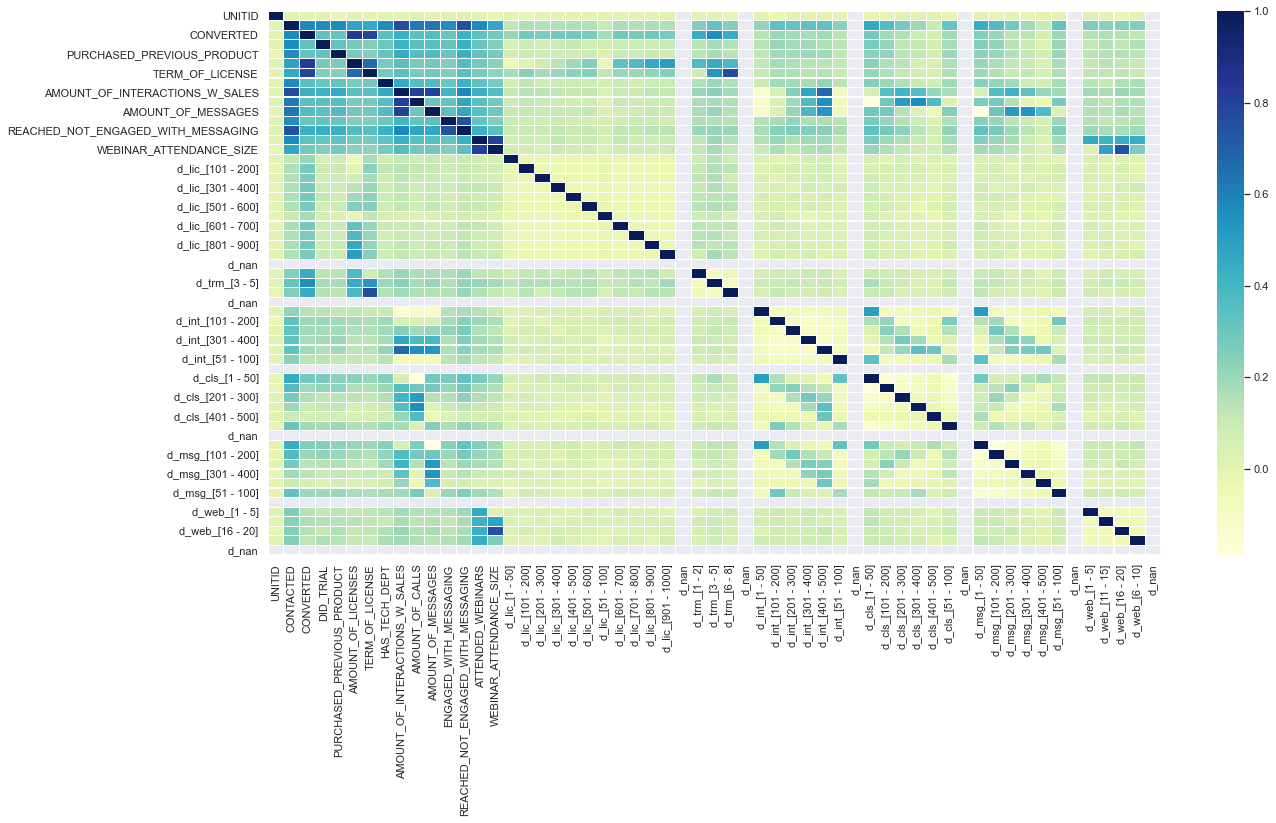

In [30]:
sns.set(font_scale=1)
plt.subplots(figsize=(20,10))
sns.heatmap(df_dummies_ranges.corr(), annot=False, linewidths=.1, cmap="YlGnBu", fmt=".2f");

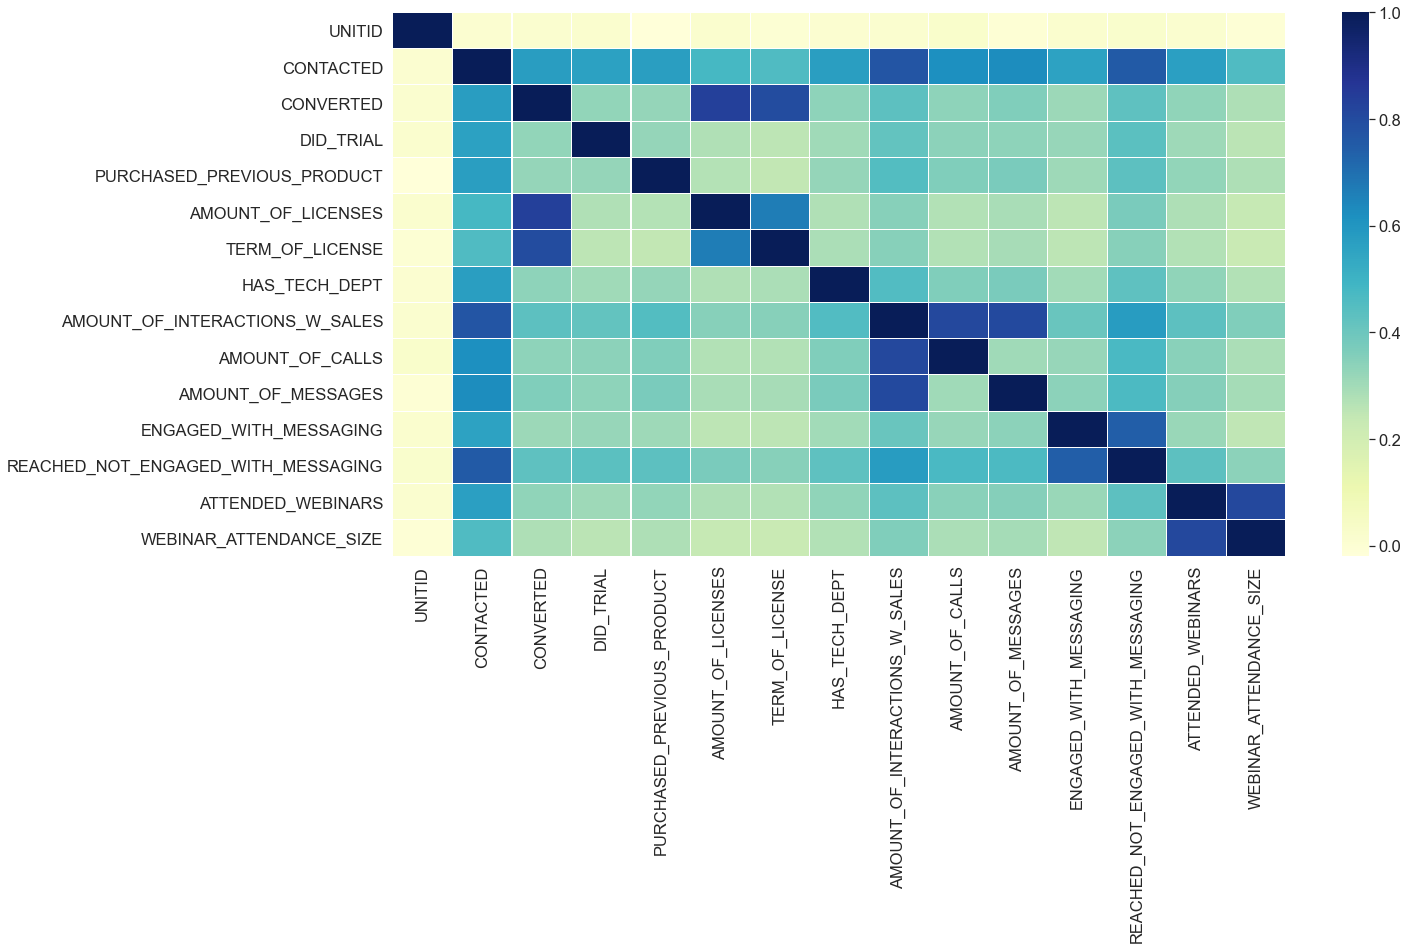

In [31]:
sns.set(font_scale=1.5)
plt.subplots(figsize=(20,10))
sns.heatmap(df_customer_data_raw.corr(), annot=False, linewidths=.1, cmap="YlGnBu", fmt=".2f");

## Interpretation of correlation analysis

The correlation is superficial at best. From this we can make redementary deductions like: 

* There is a correlation between conversion and the amount of licenses bought;
* There is a correlation between calls/messages and sales interactions; and
* Webinar attendance and size of attendance

This is unfortunately due to the data being generated with random generators. 

What is interesting is that there seems to be an inverse correlation between messages and calls. Which could suggest that there more there is of the one the less there is needed of the other. It doesn't however show us there is/isn't a correlation between sales interactions and conversions. 


In [32]:
# output data for next module to sqlite db
df_data_for_preparetion = df_remove_ambiguous_values.copy()
engine = create_engine('sqlite:///../data/customers_with_behaviours.db')
df_data_for_preparetion.to_sql('customers_with_behaviours', engine, if_exists='replace', index=False)